In [1]:
using GraphViz

using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

# SEIR model

In [2]:
seir = @stock_and_flow begin
    :stocks
    S
    E
    I
    R

    :parameters
    μ
    β
    tlatent
    trecovery
    δ

    :flows
    CLOUD => fbirth(μ * N) => S
    S => fincid(β * S * I / N) => E
    S => fdeathS(S * δ) => CLOUD
    E => finf(E / tlatent) => I
    E => fdeathE(E * δ) => CLOUD
    I => frec(I / trecovery) => R
    I => fdeathI(I * δ) => CLOUD
    R => fdeathR(R * δ) => CLOUD

    :sums
    N = [S, E, I, R]

end



StockAndFlowF {S:4, SV:1, LS:4, F:8, I:4, O:7, V:10, LV:8, LSV:2, P:5, LVV:2, LPV:8, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │     I │
│ 4 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬─────────┐
│ F │ fv │   fname │
├───┼────┼─────────┤
│ 1 │  1 │  fbirth │
│ 2 │  4 │  fincid │
│ 3 │  5 │ fdeathS │
│ 4 │  6 │    finf │
│ 5 │  7 │ fdeathE │
│ 6 │  8 │    frec │
│ 7 │  9 │ fdeathI │
│ 8 │ 10 │ fdeathR │
└───┴────┴─────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   4 │  3 │
│ 4 │   6 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   3 │  1 │
│ 3 │   4 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  3 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌────┬─────────────────┬─────┐
│  V │           vname │ vop │
├────┼─────────────────┼─────┤
│  1 │  ##v_fbirth#292 │   * │
│  2 │  ##v_fincid#293 │   * │
│  3 │  ##v_fincid#294 │   * │
│  4 │  ##v_fincid#295 │   / │
│  5 │ ##v_fdeathS#296 │   * │
│  6 │    ##v_finf#297 │   / │
│  7 │ ##v_fdeathE#298 │   * │
│  8 │    ##v_frec#299 │   / │
│  9 │ ##v_fdeathI#300 │   * │
│ 10 │ ##v_fdeathR#301 │   * │
└────┴─────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   2 │           2 │
│  2 │   3 │   3 │           2 │
│  3 │   1 │   5 │           1 │
│  4 │   2 │   6 │           1 │
│  5 │   2 │   7 │           1 │
│  6 │   3 │   8 │           1 │
│  7 │   3 │   9 │           1 │
│  8 │   4 │  10 │           1 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
│   2 │     1 │    4 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬───────────┐
│ P │     pname │
├───┼───────────┤
│ 1 │         μ │
│ 2 │         β │
│ 3 │   tlatent │
│ 4 │ trecovery │
│ 5 │         δ │
└───┴───────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     2 │     3 │             1 │
│   2 │     3 │     4 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            1 │
│   2 │    2 │    2 │            1 │
│   3 │    5 │    5 │            2 │
│   4 │    3 │    6 │            2 │
│   5 │    5 │    7 │            2 │
│   6 │    4 │    8 │            2 │
│   7 │    5 │    9 │            2 │
│   8 │    5 │   10 │            2 │
└─────┴──────┴──────┴──────────────┘

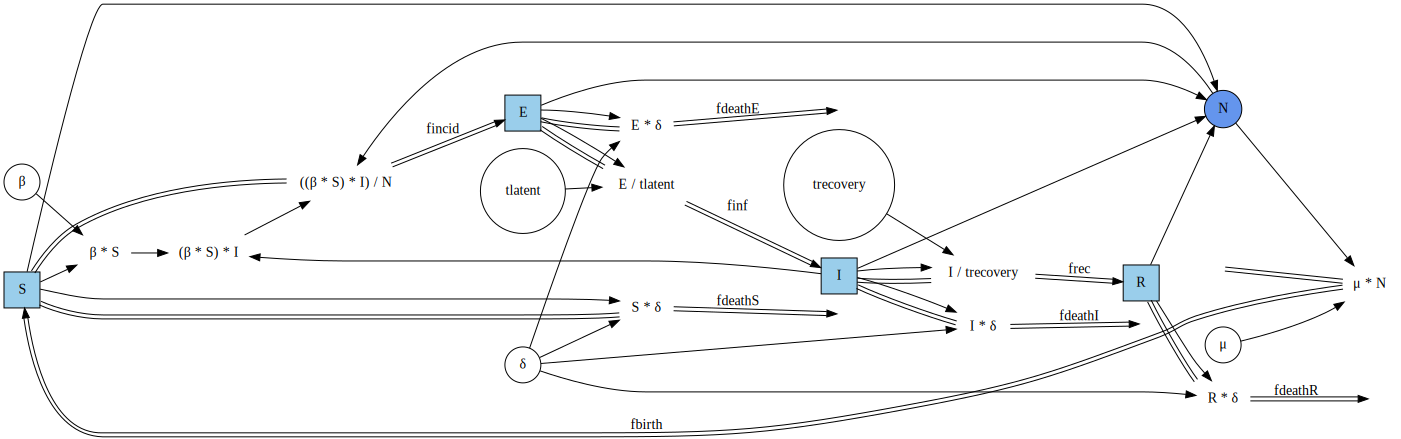

In [3]:
GraphF(seir)

# 1.  Measles model 
## Time unit: Month

In [4]:
# define parameter values and initial values of stocks
# define constant parameters
p_measles = LVector(
    β=49.598, μ=0.03/12, δ=0.03/12, tlatent=8.0/30, trecovery=5.0/30
)
# define initial values for stocks
u0_measles = LVector(
    S=90000.0-930.0, E=0.0, I=930.0, R=773545.0
)

4-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}:
 :S => 89070.0
 :E => 0.0
 :I => 930.0
 :R => 773545.0

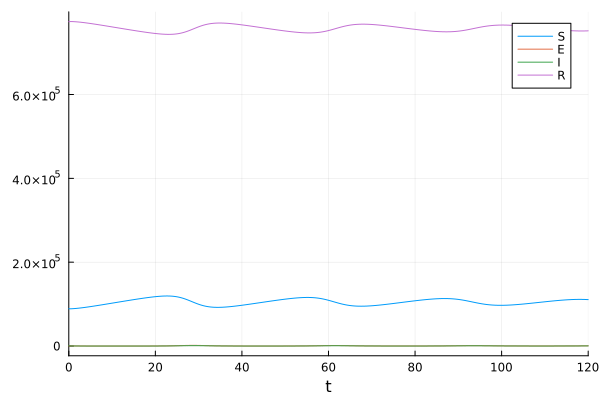

In [5]:
# solve the ODEs
# The model results are compared with the same model built by Anylogic, and the resules are the same!
prob_measles = ODEProblem(vectorfield(seir),u0_measles,(0.0,120.0),p_measles);
sol_measles = solve(prob_measles,Tsit5(),abstol=1e-8);
plot(sol_measles)

# 2. Chickenpox model 
## Time unit: Month

In [6]:
# define parameter values and initial values of stocks
# define constant parameters
p_chickenpox = LVector(
    β=18.0, μ=0.03/12.0, δ=0.03/12.0, tlatent=14.0/30.0, trecovery=5.0/30.0
)
# define initial values for stocks
u0_chickenpox = LVector(
    S=295354.0, E=0.0, I=1000.0, R=567191.0
)

4-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}:
 :S => 295354.0
 :E => 0.0
 :I => 1000.0
 :R => 567191.0

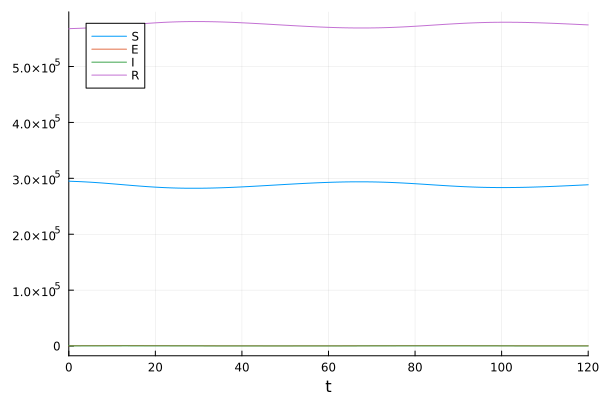

In [7]:
# solve the ODEs
# The model results are compared with the same model built by Anylogic, and the resules are the same!
prob_chickenpox = ODEProblem(vectorfield(seir),u0_chickenpox,(0.0,120.0),p_chickenpox);
sol_chickenpox = solve(prob_chickenpox,Tsit5(),abstol=1e-8);
plot(sol_chickenpox)

In [8]:
sol_chickenpox

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 298-element Vector{Float64}:
   0.0
   2.8133919327141074e-9
   3.0947311259855185e-8
   3.122865045312659e-7
   3.125678437245373e-6
   3.1259597764386445e-5
   0.00031259879103579717
   0.003125990723749904
   0.015721220942788605
   0.04026863845950178
   ⋮
 116.95057564863274
 117.38101312924142
 117.81143080997383
 118.24182866323792
 118.67220671844858
 119.10256500501667
 119.53290360934692
 119.96322253233947
 120.0
u: 298-element Vector{LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}}:
 4-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}:
 :S => 295354.0
 :E => 0.0
 :I => 1000.0
 :R => 567191.0
 4-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}:
 :S => 295353.99998667586
 :E => 1.7320507818745795e-5
 :I => 999.9999831126152
 :R => 567191.000012891
 4-element LArray{Float64, 1, Vector{Float64}, (:S, :E, :I, :R)}:
 :S => 295353.9998534344
 :E => 0.00019052556412603002
 :

In [9]:
# to have the figures plotted fix to the wider of the cells
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")


HTML{String}("<style>\n.output_svg div{\n  width: 100% !important;\n  height: 100% !important;\n}\n</style>\n")